# Raising Series A Fund Prediction
InReach Venture's technical interview task: predict if a company will raise series A, with a stretch to predict how much. 

Here I will take the necessary steps to make this happen. I will start by importing the necessary packages. Next I will load the data and conduct exploratory data analysis (EDA) this is critical when deciding on which machine specific features which is then fed intomy machine learning model. I'd like to then do a quick accuracy measure using an ROC curve to see the performance of the chosen machine learning algorithm. 

I will then do a quick summary of my findings. 

## Importing Packages, Data & Preprocessing

In [1]:
#importing necessary packages
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import statsmodels.api as sm
from sklearn.model_selection import train_test_split,KFold,cross_validate
from sklearn.linear_model import LinearRegression

/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
funding_rounds = pd.read_csv('../venturecapitalproject/data/funding_rounds.csv', delimiter=',', quotechar='"', escapechar='\\' )
funding_rounds.head()

,id,funding_round_id,object_id,funded_at,funding_round_type,funding_round_code,raised_amount_usd,raised_amount,raised_currency_code,pre_money_valuation_usd,...,post_money_valuation,post_money_currency_code,participants,is_first_round,is_last_round,source_url,source_description,created_by,created_at,updated_at
0,1,1,c:4,2006-12-01,series-b,b,8500000,8500000,USD,N,...,N,N,2,0,0,http://www.marketingvox.com/archives/2006/12/2...,N,initial-importer,2007-07-04 04:52:57,2008-02-27 23:14:29
1,2,2,c:5,2004-09-01,angel,angel,500000,500000,USD,N,...,N,USD,2,0,1,N,N,initial-importer,2007-05-27 06:08:18,2013-06-28 20:07:23
2,3,3,c:5,2005-05-01,series-a,a,12700000,12700000,USD,115000000,...,N,USD,3,0,0,http://www.techcrunch.com/2007/11/02/jim-breye...,Jim Breyer: Extra $500 Million Round For Faceb...,initial-importer,2007-05-27 06:09:10,2013-06-28 20:07:23
3,4,4,c:5,2006-04-01,series-b,b,27500000,27500000,USD,525000000,...,N,USD,4,0,0,http://www.facebook.com/press/info.php?factsheet,Facebook Funding,initial-importer,2007-05-27 06:09:36,2013-06-28 20:07:24
4,5,5,c:7299,2006-05-01,series-b,b,10500000,10500000,USD,N,...,N,N,2,0,0,http://www.techcrunch.com/2006/05/14/photobuck...,PhotoBucket Closes $10.5M From Trinity Ventures,initial-importer,2007-05-29 11:05:59,2008-04-16 17:09:12


In [3]:
funding_rounds.shape

(52928, 23)

In [4]:
#delete duplicates
funding_rounds = funding_rounds.drop_duplicates() #removing duplicates
funding_rounds = funding_rounds.dropna() #removing nulls
print(funding_rounds.shape)

(52924, 23)


In [5]:
funding_rounds.dtypes #look at data types to see what needs to be converted


id                           int64
funding_round_id             int64
object_id                   object
funded_at                   object
funding_round_type          object
funding_round_code          object
raised_amount_usd           object
raised_amount               object
raised_currency_code        object
pre_money_valuation_usd     object
pre_money_valuation         object
pre_money_currency_code     object
post_money_valuation_usd    object
post_money_valuation        object
post_money_currency_code    object
participants                 int64
is_first_round               int64
is_last_round                int64
source_url                  object
source_description          object
created_by                  object
created_at                  object
updated_at                  object
dtype: object

In [6]:
funding_rounds2 = funding_rounds[funding_rounds['raised_amount_usd'] != '\\N']
print(funding_rounds2.shape)

(52924, 23)


### A big thing that I've noticed here is that if I remove `\\N` from most of the dataset, we are left with not a lot of data to analyze. Especially if I remove this from pre-money. This means that a lot of the pre-money and post money valuation for startups is super difficult to define. 

In [11]:
#convert objects into integars for more efficient feature manipulation
#funding_rounds2['raised_amount_usd'] = (funding_rounds2['raised_amount_usd'].astype(float))
#funding_rounds2['raised_amount'] = (funding_rounds2['raised_amount'].astype(int))
#funding_rounds2['pre_money_valuation_usd '] = (funding_rounds2['pre_money_valuation_usd'].astype(float))
#funding_rounds2['pre_money_valuation'] = (funding_rounds2['pre_money_valuation'].astype(int))
#funding_rounds2['post_money_valuation_usd'] = (funding_rounds2['post_money_valuation_usd'].astype(float))
#funding_rounds2['post_money_valuation'] = (funding_rounds2['post_money_valuation'].astype(int))


In [12]:
funding_rounds.describe()

,id,funding_round_id,participants,is_first_round,is_last_round
count,52924.000000,52924.000000,52924.000000,52924.000000,52924.000000
mean,28964.026377,28964.026377,1.528626,0.604546,0.604508
std,16821.917106,16821.917106,2.060246,0.488953,0.488961
min,1.000000,1.000000,0.000000,0.000000,0.000000
25%,14344.750000,14344.750000,0.000000,0.000000,0.000000
50%,28887.500000,28887.500000,1.000000,1.000000,1.000000
75%,43562.500000,43562.500000,2.000000,1.000000,1.000000
max,57952.000000,57952.000000,36.000000,1.000000,1.000000


In [13]:
funding_rounds.funded_at.value_counts() #snapshot at dates

2012-01-01    462
2008-01-01    462
2007-01-01    391
2011-01-01    356
2010-01-01    320
             ... 
1998-02-01      1
2004-12-16      1
2010-07-05      1
1995-03-17      1
2011-12-25      1
Name: funded_at, Length: 3400, dtype: int64

The data here shows that all of the companies captured were funded between 2002-2008

In [14]:
ipo = pd.read_csv('../venturecapitalproject/data/ipos.csv', delimiter=',', quotechar='"', escapechar='\\')
print(ipo.shape)
ipo.head()

(1259, 13)


,id,ipo_id,object_id,valuation_amount,valuation_currency_code,raised_amount,raised_currency_code,public_at,stock_symbol,source_url,source_description,created_at,updated_at
0,1,1,c:1654,N,USD,N,USD,1980-12-19,NASDAQ:AAPL,N,N,2008-02-09 05:17:45,2012-04-12 04:02:59
1,2,2,c:1242,N,USD,N,N,1986-03-13,NASDAQ:MSFT,N,N,2008-02-09 05:25:18,2010-12-11 12:39:46
2,3,3,c:342,N,USD,N,N,1969-06-09,NYSE:DIS,N,N,2008-02-09 05:40:32,2010-12-23 08:58:16
3,4,4,c:59,N,USD,N,N,2004-08-25,NASDAQ:GOOG,N,N,2008-02-10 22:51:24,2011-08-01 20:47:08
4,5,5,c:317,100000000000,USD,N,N,1997-05-01,NASDAQ:AMZN,N,N,2008-02-10 23:28:09,2011-08-01 21:11:22


In [15]:
ipo = ipo.drop_duplicates() #removing duplicates
ipo = ipo.dropna() #removing null values
print(ipo.shape)
ipo.describe()

(1252, 13)


,id,ipo_id
count,1252.000000,1252.000000
mean,630.920927,691.222843
std,362.461237,391.867095
min,1.000000,1.000000
25%,317.750000,358.750000
50%,630.500000,688.500000
75%,944.250000,1025.250000
max,1259.000000,1376.000000


In [16]:
objects = pd.read_csv('../venturecapitalproject/data/objects.csv', delimiter=',', quotechar='"', escapechar='\\')
objects.head()

,id,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,founded_at,...,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at
0,c:1,Company,1,N,Wetpaint,wetpaint,/company/wetpaint,web,operating,2005-10-17,...,2008-05-19,3,39750000,2010-09-05,2013-09-18,5,17,initial-importer,2007-05-25 06:51:27,2013-04-13 03:29:00
1,c:10,Company,10,N,Flektor,flektor,/company/flektor,games_video,acquired,N,...,N,N,N,N,N,N,6,initial-importer,2007-05-31 21:11:51,2008-05-23 23:23:14
2,c:100,Company,100,N,There,there,/company/there,games_video,acquired,N,...,N,N,N,2003-02-01,2011-09-23,4,12,initial-importer,2007-08-06 23:52:45,2013-11-04 02:09:48
3,c:10000,Company,10000,N,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,2008-07-26,...,N,N,N,N,N,N,N,N,2008-08-24 16:51:57,2008-09-06 14:19:18
4,c:10001,Company,10001,N,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,2008-07-26,...,N,N,N,N,N,N,N,N,2008-08-24 17:10:34,2008-09-06 14:19:18


In [17]:
print(objects.shape)

(462651, 40)


In [18]:
objects = objects.drop_duplicates()
objects = objects.dropna()
print(objects.shape)
objects.describe()

(360922, 40)


,entity_id
count,360922.000000
mean,138518.359801
std,88046.888724
min,1.000000
25%,50602.250000
50%,152451.000000
75%,217905.000000
max,286213.000000


The objects data set shows that that is a significant drop due to data replication

In [19]:
people = pd.read_csv('../venturecapitalproject/data/people.csv', delimiter=',', quotechar='"', escapechar='\\')
print(people.shape)
people.head()

(226709, 6)


,id,object_id,first_name,last_name,birthplace,affiliation_name
0,1,p:2,Ben,Elowitz,N,Blue Nile
1,2,p:3,Kevin,Flaherty,N,Wetpaint
2,3,p:4,Raju,Vegesna,N,Zoho
3,4,p:5,Ian,Wenig,N,Zoho
4,5,p:6,Kevin,Rose,"Redding, CA",i/o Ventures


In [20]:
people = people.drop_duplicates()
people = people.dropna()
print(people.shape)
people.describe()

(226702, 6)


,id
count,226702.000000
mean,113356.034155
std,65446.032618
min,1.000000
25%,56676.250000
50%,113357.500000
75%,170033.750000
max,226709.000000


In [21]:
relationships = pd.read_csv('../venturecapitalproject/data/relationships.csv', delimiter=',', quotechar='"', escapechar='\\')
print(relationships.shape)
relationships.head()

(402878, 11)


,'id','relationship_id','person_object_id','relationship_object_id','start_at','end_at','is_past','sequence','title','created_at','updated_at'
0,1,1,p:2,c:1,N,N,0,8,Co-Founder/CEO/Board of Directors,2007-05-25 07:03:54,2013-06-03 09:58:46
1,2,2,p:3,c:1,N,N,1,279242,VP Marketing,2007-05-25 07:04:16,2010-05-21 16:31:34
2,3,3,p:4,c:3,N,N,0,4,Evangelist,2007-05-25 19:33:03,2013-06-29 13:36:58
3,4,4,p:5,c:3,2006-03-01,2009-12-01,1,4,Senior Director Strategic Alliances,2007-05-25 19:34:53,2013-06-29 10:25:34
4,6,6,p:7,c:4,2005-07-01,2010-04-05,1,1,Chief Executive Officer,2007-05-25 20:05:33,2010-04-05 18:41:41


In [22]:
relationships = relationships.drop_duplicates()
relationships = relationships.dropna()
print(relationships.shape)

(389534, 11)


In [23]:
relationships.describe()

,'id','relationship_id','is_past','sequence'
count,389534.000000,389534.000000,389534.000000,389534.000000
mean,242866.264164,242866.264164,0.398189,2989.676955
std,138865.344831,138865.344831,0.489525,28166.461542
min,1.000000,1.000000,0.000000,1.000000
25%,122473.250000,122473.250000,0.000000,1.000000
50%,241869.500000,241869.500000,0.000000,1.000000
75%,364383.750000,364383.750000,1.000000,3.000000
max,480909.000000,480909.000000,1.000000,399946.000000


***Note that I attempted to load the data in without needing to omit bad data entries but could not do this without `error_bad_lines`. If I had more time I would tokenize the file and then parse it using additional code. Something that I would need to practice and play around with before I got it exact***

## Exploratory Data Analysis

I will start to explore the funding_rounds dataset. I will include any data visualisations to help me get a better understanding on how to best predict series A funding. The reason why I have left out the other datasets for now is because IPO focuses on startups that have passed series A. 

## Funding Rounds Dataset

In [24]:
print(funding_rounds2.shape)
print(funding_rounds2.keys())
funding_rounds.head()

(52924, 23)
Index(['id', 'funding_round_id', 'object_id', 'funded_at',
       'funding_round_type', 'funding_round_code', 'raised_amount_usd',
       'raised_amount', 'raised_currency_code', 'pre_money_valuation_usd',
       'pre_money_valuation', 'pre_money_currency_code',
       'post_money_valuation_usd', 'post_money_valuation',
       'post_money_currency_code', 'participants', 'is_first_round',
       'is_last_round', 'source_url', 'source_description', 'created_by',
       'created_at', 'updated_at '],
      dtype='object')


,id,funding_round_id,object_id,funded_at,funding_round_type,funding_round_code,raised_amount_usd,raised_amount,raised_currency_code,pre_money_valuation_usd,...,post_money_valuation,post_money_currency_code,participants,is_first_round,is_last_round,source_url,source_description,created_by,created_at,updated_at
0,1,1,c:4,2006-12-01,series-b,b,8500000,8500000,USD,N,...,N,N,2,0,0,http://www.marketingvox.com/archives/2006/12/2...,N,initial-importer,2007-07-04 04:52:57,2008-02-27 23:14:29
1,2,2,c:5,2004-09-01,angel,angel,500000,500000,USD,N,...,N,USD,2,0,1,N,N,initial-importer,2007-05-27 06:08:18,2013-06-28 20:07:23
2,3,3,c:5,2005-05-01,series-a,a,12700000,12700000,USD,115000000,...,N,USD,3,0,0,http://www.techcrunch.com/2007/11/02/jim-breye...,Jim Breyer: Extra $500 Million Round For Faceb...,initial-importer,2007-05-27 06:09:10,2013-06-28 20:07:23
3,4,4,c:5,2006-04-01,series-b,b,27500000,27500000,USD,525000000,...,N,USD,4,0,0,http://www.facebook.com/press/info.php?factsheet,Facebook Funding,initial-importer,2007-05-27 06:09:36,2013-06-28 20:07:24
4,5,5,c:7299,2006-05-01,series-b,b,10500000,10500000,USD,N,...,N,N,2,0,0,http://www.techcrunch.com/2006/05/14/photobuck...,PhotoBucket Closes $10.5M From Trinity Ventures,initial-importer,2007-05-29 11:05:59,2008-04-16 17:09:12


In [25]:
funding_rounds['funding_round_type'].value_counts()

venture           15342
angel             13159
series-a           9873
series-b           4892
series-c+          4216
other              4201
private-equity     1043
crowdfunding        111
post-ipo             87
Name: funding_round_type, dtype: int64

([], [])

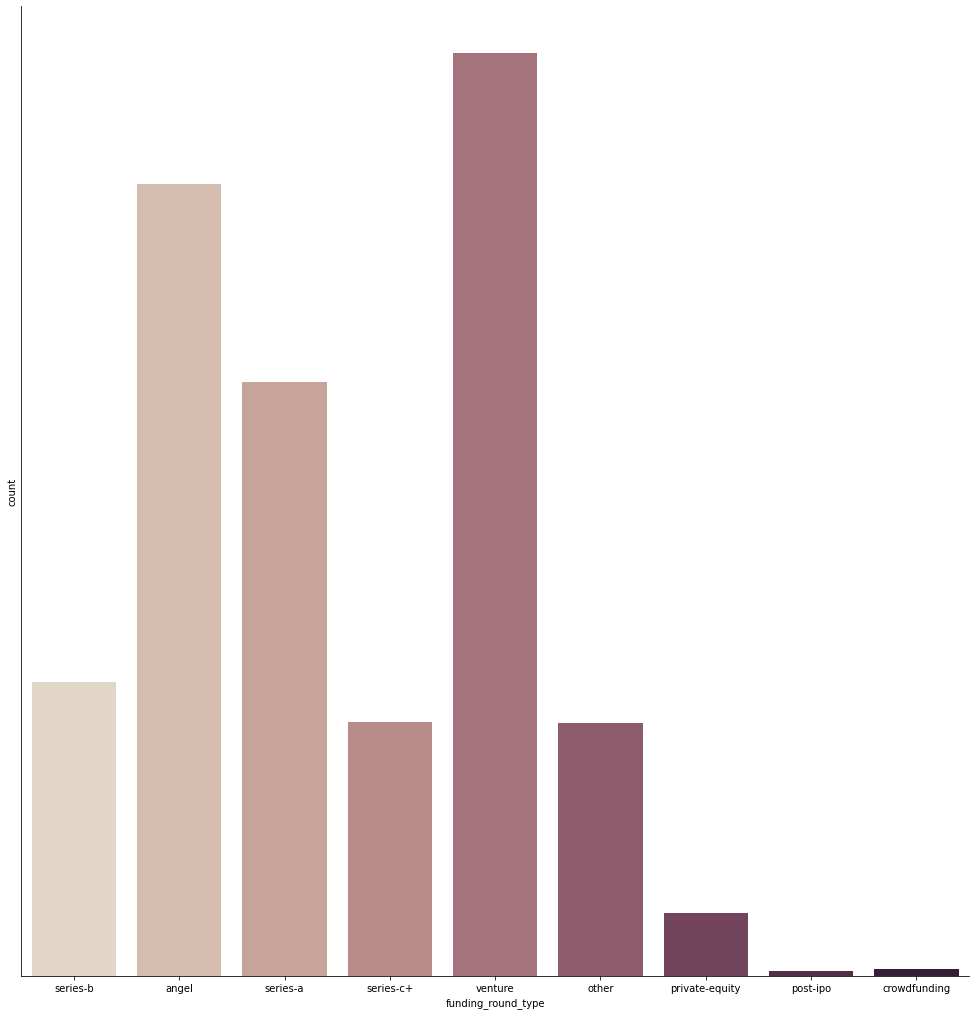

In [26]:
#How is the funding round type distributed?

sns.catplot(x="funding_round_type", kind="count", palette="ch:.25", data=funding_rounds, height = 14)
plt.yticks([])
#ax.tick_params(axis='both', which='major', labelsize=15)

#ax.set_title('Funding Round Type Distribution', fontsize=25, loc='center', weight='bold', pad=20)


([], [])

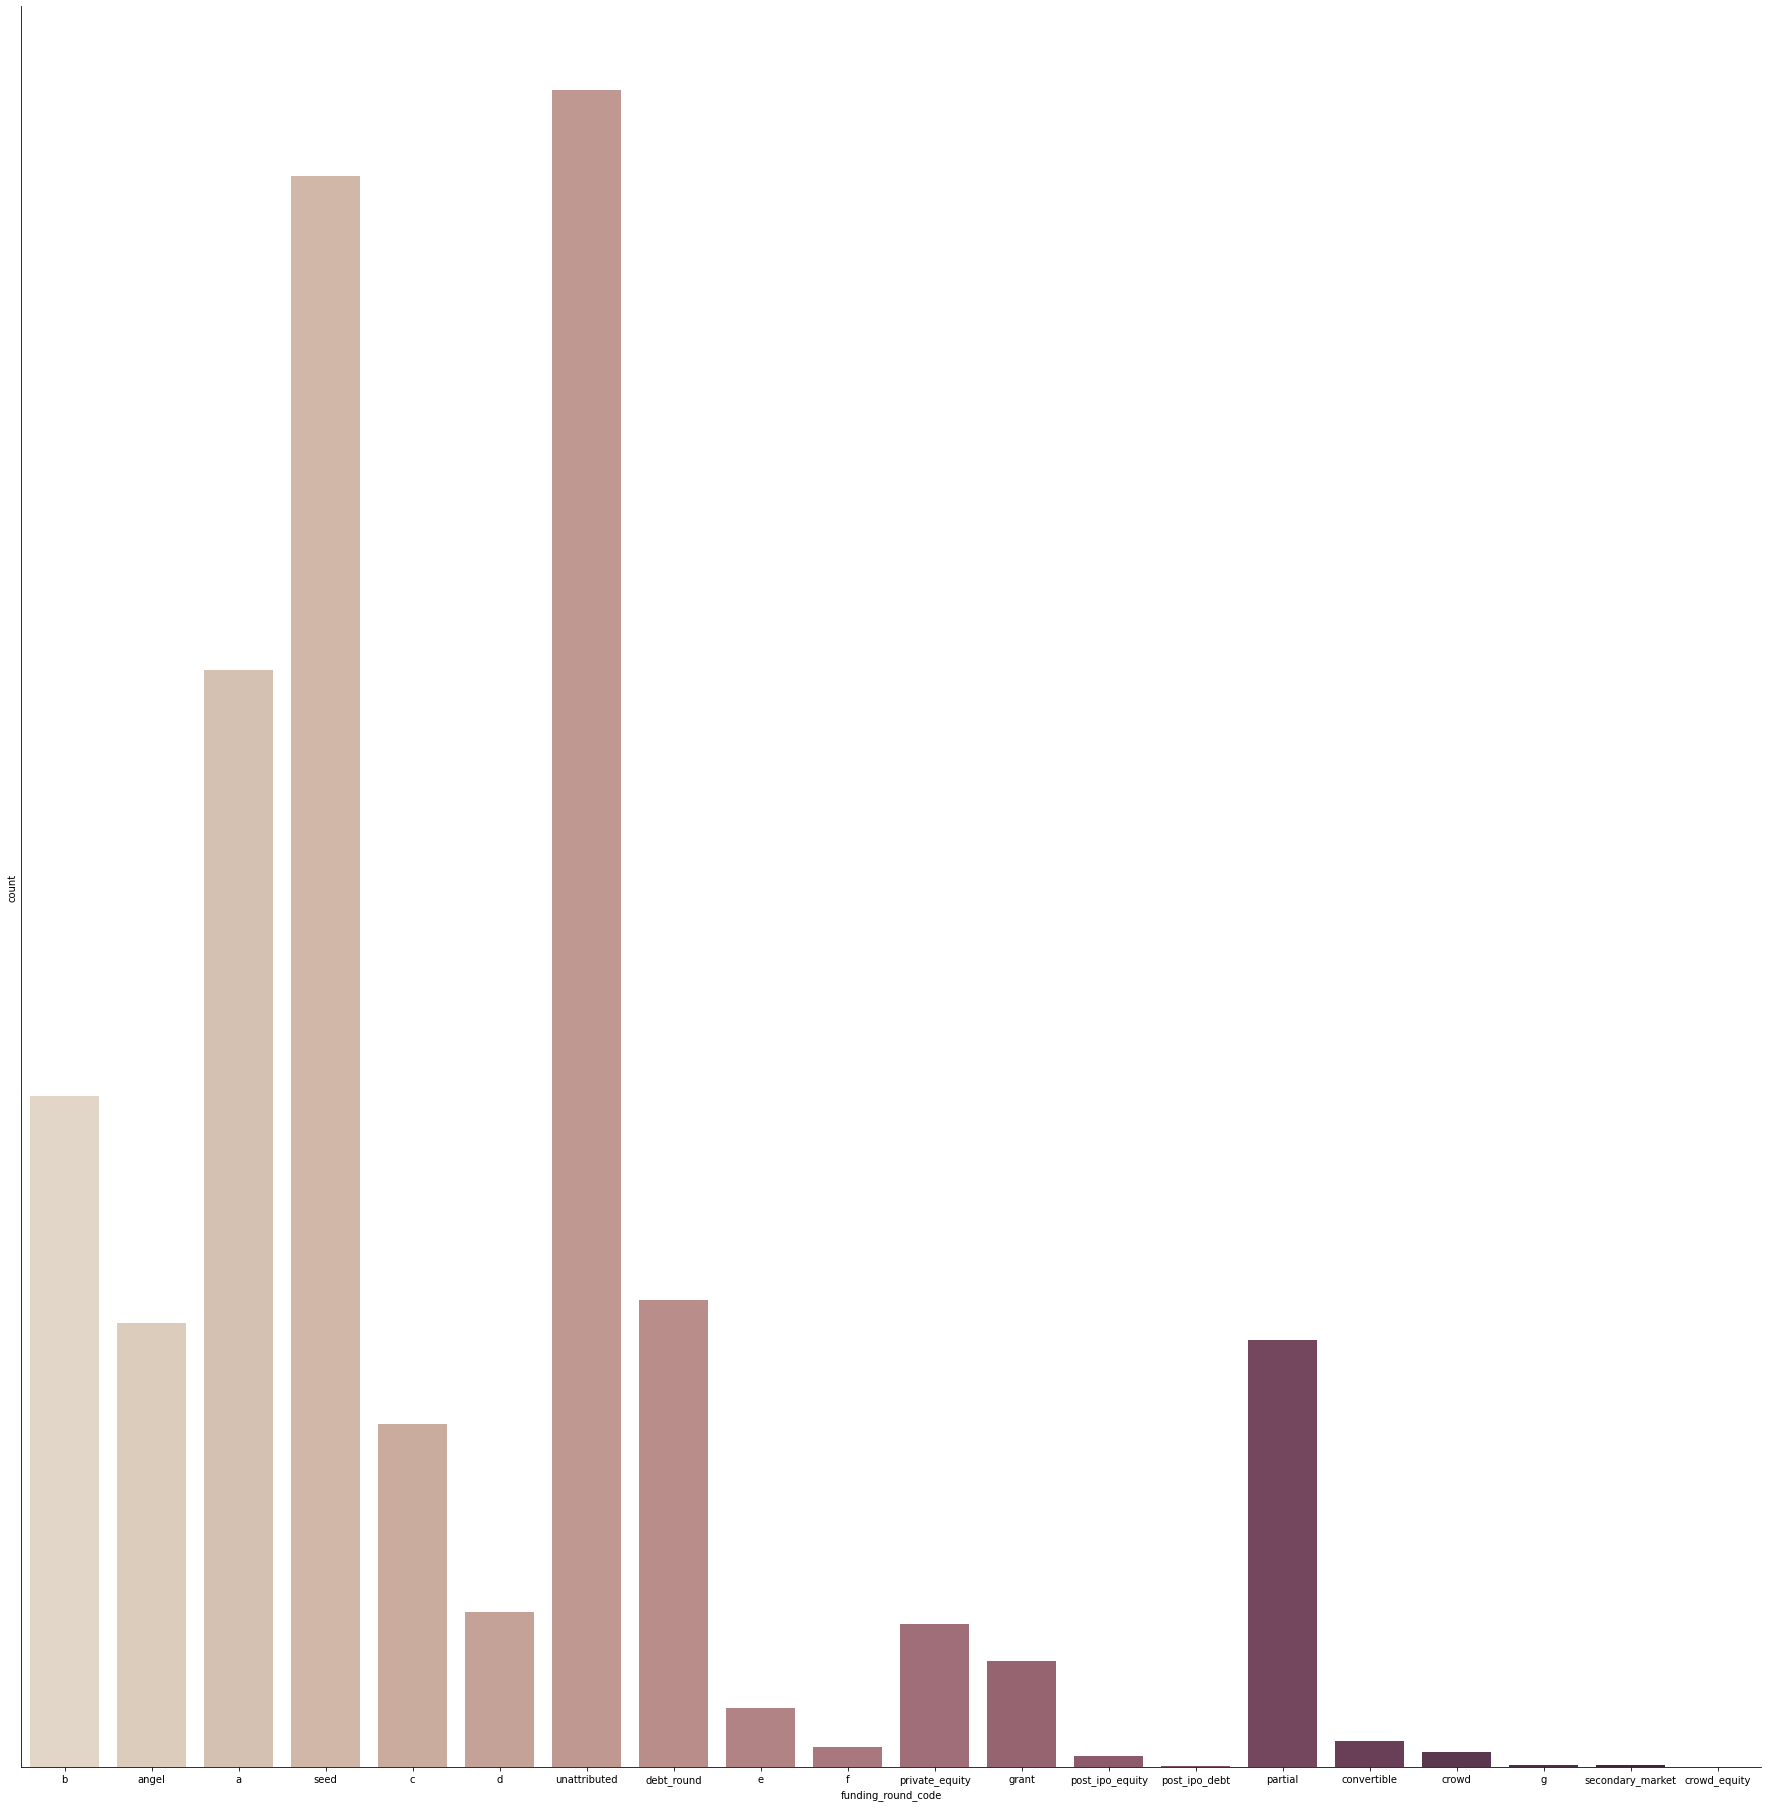

In [27]:
sns.catplot(x="funding_round_code", kind="count", palette="ch:.25", data=funding_rounds, height = 25)
plt.yticks([])

The most common type of funding round is venture. Often, as you know, InReach. Venture funding largely covers early stage startups and seed rounds. 

In [28]:
funding_rounds['raised_currency_code'].value_counts()

USD    45704
N       3063
EUR     2394
GBP     1313
CAD      278
SEK       80
JPY       67
AUD       22
NIS        3
Name: raised_currency_code, dtype: int64

This is super important to look at. Especially as a VC located within Europe. Most companies may be located within the US, but startups often prefer to raise using USD

For the purpose of this exercise I will stick to USD. 

In [29]:
funding_rounds2['raised_amount_usd'].max()

'N'

([], [])

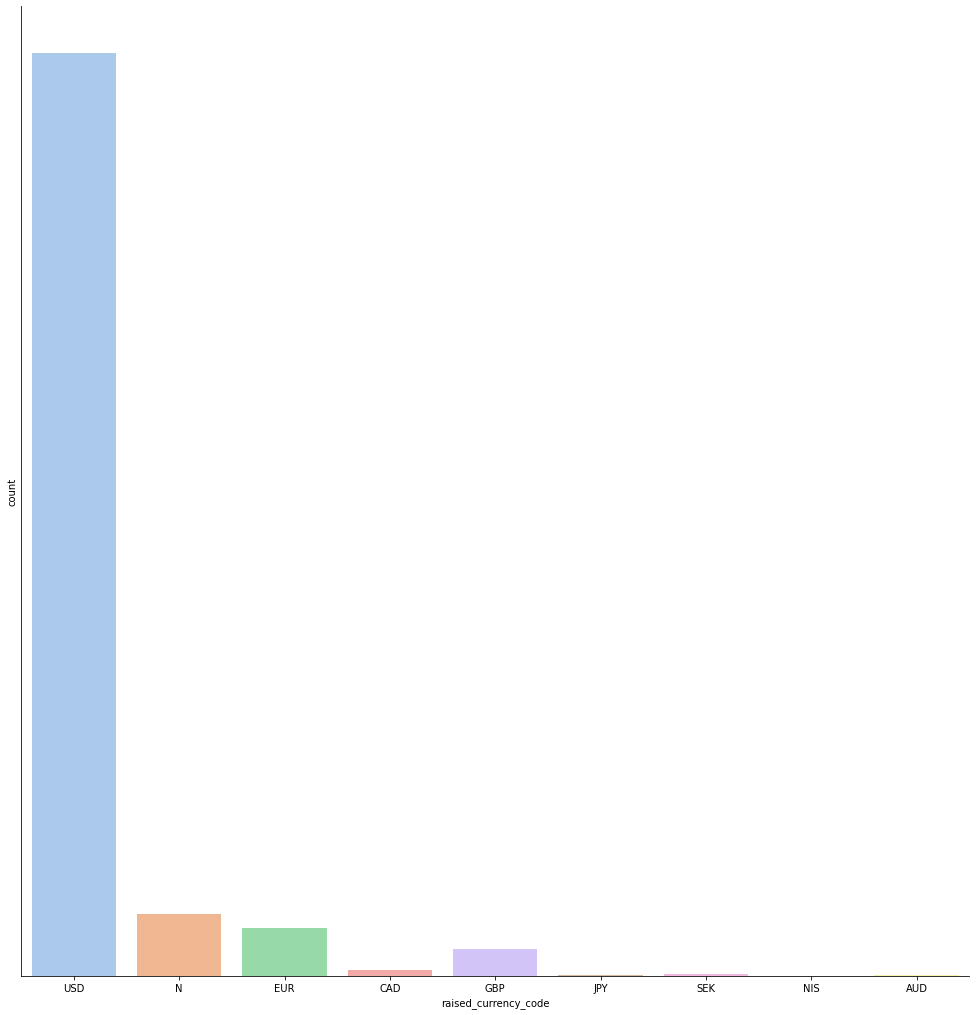

In [30]:
sns.catplot(x="raised_currency_code", kind="count", palette="pastel", data=funding_rounds, height = 14)
plt.yticks([])
#ax.tick_params(axis='both', which='major', labelsize=15)

#ax.set_title('Currency Distribution', fontsize=25, loc='center', weight='bold', pad=20)

I would like to do a regression model to see about raising series A. In order to do this I want to have a better look at what determines the best features


In [31]:
funding_rounds.shape

(52924, 23)

In [32]:
funding_rounds.dtypes

id                           int64
funding_round_id             int64
object_id                   object
funded_at                   object
funding_round_type          object
funding_round_code          object
raised_amount_usd           object
raised_amount               object
raised_currency_code        object
pre_money_valuation_usd     object
pre_money_valuation         object
pre_money_currency_code     object
post_money_valuation_usd    object
post_money_valuation        object
post_money_currency_code    object
participants                 int64
is_first_round               int64
is_last_round                int64
source_url                  object
source_description          object
created_by                  object
created_at                  object
updated_at                  object
dtype: object

In [34]:
funding_rounds.sort_values(by='raised_amount_usd')

,id,funding_round_id,object_id,funded_at,funding_round_type,funding_round_code,raised_amount_usd,raised_amount,raised_currency_code,pre_money_valuation_usd,...,post_money_valuation,post_money_currency_code,participants,is_first_round,is_last_round,source_url,source_description,created_by,created_at,updated_at
22558,24496,24496,c:83716,2010-04-25,angel,seed,1000,1000,USD,N,...,N,N,1,0,1,http://www.lagbook.com/files/download/MjAxMjA4...,LAGbook - The Business Plan,lagbook,2011-07-30 06:06:01,2012-10-15 11:13:21
29775,32511,32511,c:171150,2012-08-10,angel,seed,1000,1000,USD,N,...,N,N,1,1,1,N,N,N,2012-09-11 17:31:48,2012-09-18 17:02:28
21106,22862,22862,c:75669,N,angel,seed,1000,1000,USD,N,...,N,N,0,0,0,N,N,rfernandes,2011-05-08 05:56:45,2011-05-09 00:38:24
40142,44070,44070,c:242518,2012-08-10,venture,partial,1000,1000,USD,N,...,N,USD,0,1,1,http://www.sec.gov/Archives/edgar/data/1555871...,SEC,ramesh2013,2013-07-29 13:22:50,2013-07-29 13:22:50
24605,26788,26788,c:143216,2011-05-01,angel,seed,1000,1000,USD,N,...,N,N,0,1,1,N,N,natasha_rawlings,2011-11-30 03:27:01,2011-12-02 07:40:41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48147,53002,53002,c:223894,2013-03-01,angel,seed,N,N,USD,N,...,N,USD,1,1,1,N,y combinator source,rahul569,2013-10-28 10:56:21,2013-10-28 10:56:21
36157,39574,39574,c:79332,2013-06-07,private-equity,private_equity,N,N,USD,N,...,N,USD,2,1,0,http://www.vcaonline.com/news/news.asp?ID=2013...,Scratch Music Group Receives Growth Funding fr...,kshitish2013,2013-06-08 06:49:56,2013-06-08 06:49:56
48145,53000,53000,c:274951,2013-03-01,angel,seed,N,N,USD,N,...,N,USD,2,1,1,N,y combinator source,rahul569,2013-10-28 10:49:35,2013-10-28 10:49:35
3560,3932,3932,c:13922,2008-09-17,series-a,a,N,N,N,N,...,N,N,2,0,1,http://www.rpxcorp.com/news.html,Press release,erick,2008-11-24 15:12:12,2008-11-24 15:12:12


In [35]:
raised_amt_not_list = funding_rounds.query('raised_amount_usd=="N"').count()
raised_amt_not_list.count()

23

In [36]:
funding_rounds.query('raised_amount_usd=="N"')

,id,funding_round_id,object_id,funded_at,funding_round_type,funding_round_code,raised_amount_usd,raised_amount,raised_currency_code,pre_money_valuation_usd,...,post_money_valuation,post_money_currency_code,participants,is_first_round,is_last_round,source_url,source_description,created_by,created_at,updated_at
48,53,53,c:75,2005-04-01,angel,seed,N,N,N,N,...,N,N,4,1,1,http://www.techcrunch.com/?p=23,Profile: Del.icio.us,initial-importer,2007-08-15 09:31:41,2008-05-20 01:50:26
52,58,58,c:78,2005-03-01,series-a,a,N,N,N,N,...,N,N,3,0,1,http://blog.topix.com/pdf/press_2005_03_23.pdf,N,initial-importer,2007-06-27 08:39:18,2008-12-11 06:13:13
58,64,64,c:83,2006-03-01,series-a,a,N,N,N,N,...,N,N,2,1,1,http://techcrunch.com/2006/03/06/allpeers-nail...,AllPeers Nails Series A Funding,initial-importer,2007-06-28 07:55:00,2010-03-06 00:28:43
81,87,87,c:103,2007-04-01,series-a,a,N,N,N,N,...,N,N,2,0,1,http://pulse2.com/2007/04/17/recent-tech-fundi...,N,initial-importer,2007-07-06 06:21:56,2008-06-17 17:40:43
92,99,99,c:47,2007-01-01,series-a,a,N,N,N,N,...,N,N,3,0,1,http://www.techcrunch.com/2007/07/09/big-big-r...,N,initial-importer,2007-07-10 19:58:30,2013-03-26 23:02:22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52855,57880,57880,c:285244,2011-01-01,series-a,a,N,1615000,EUR,N,...,N,USD,3,0,0,N,N,sandernijssen,2013-12-12 10:38:45,2013-12-12 12:51:11
52857,57882,57882,c:285244,2009-01-01,angel,angel,N,350000,EUR,N,...,N,USD,3,0,1,N,N,sandernijssen,2013-12-12 10:41:27,2013-12-12 12:51:16
52887,57912,57912,c:60389,2013-07-10,series-c+,c,N,N,EUR,N,...,N,USD,1,1,1,http://www.rockethome.de/news/press/growth-cap...,Growth Capital for ROCKETHOME,crunchrockethome,2013-12-12 12:32:53,2013-12-12 13:02:54
52915,57940,57940,c:65946,2013-12-12,venture,unattributed,N,N,USD,N,...,N,USD,0,1,0,http://finance.yahoo.com/news/avinger-complete...,Avinger Completes Major New Financing,amit2013,2013-12-12 13:33:40,2013-12-12 13:33:40


In [37]:
funding_rounds.shape

(52924, 23)

In [38]:
total_companies = 52924

In [39]:
comp_disclosed = 52924 - 5997 

In [40]:
print(comp_disclosed/total_companies*100, "%")


88.66865694203008 %


## It seems that there are 5,997 companies/startups that do not disclose their amount raised.  88.67% companies have disclosed the amount that they have raised.

## I wanted to attempt to created a binary classification for my logistic regression model. Based on domain research, a majority of companies that do make it to series A have raised on average $2 million in seed and angel rounds. If I can do a quick classification of whether a company has met this criteria then I would be able to then make a general assumption that could help with training my machine learning model. 

# Feature Engineering

In [47]:
funding_rounds = funding_rounds[funding_rounds.raised_amount_usd != 'N']

ValueError: unknown type str32

In [48]:
funding_rounds.shape

(46927, 23)

In [49]:
funding_rounds['raised_amount_usd'] = (funding_rounds['raised_amount_usd'].astype(int))

In [50]:
funding_rounds

,id,funding_round_id,object_id,funded_at,funding_round_type,funding_round_code,raised_amount_usd,raised_amount,raised_currency_code,pre_money_valuation_usd,...,post_money_valuation,post_money_currency_code,participants,is_first_round,is_last_round,source_url,source_description,created_by,created_at,updated_at
0,1,1,c:4,2006-12-01,series-b,b,8500000,8500000,USD,N,...,N,N,2,0,0,http://www.marketingvox.com/archives/2006/12/2...,N,initial-importer,2007-07-04 04:52:57,2008-02-27 23:14:29
1,2,2,c:5,2004-09-01,angel,angel,500000,500000,USD,N,...,N,USD,2,0,1,N,N,initial-importer,2007-05-27 06:08:18,2013-06-28 20:07:23
2,3,3,c:5,2005-05-01,series-a,a,12700000,12700000,USD,115000000,...,N,USD,3,0,0,http://www.techcrunch.com/2007/11/02/jim-breye...,Jim Breyer: Extra $500 Million Round For Faceb...,initial-importer,2007-05-27 06:09:10,2013-06-28 20:07:23
3,4,4,c:5,2006-04-01,series-b,b,27500000,27500000,USD,525000000,...,N,USD,4,0,0,http://www.facebook.com/press/info.php?factsheet,Facebook Funding,initial-importer,2007-05-27 06:09:36,2013-06-28 20:07:24
4,5,5,c:7299,2006-05-01,series-b,b,10500000,10500000,USD,N,...,N,N,2,0,0,http://www.techcrunch.com/2006/05/14/photobuck...,PhotoBucket Closes $10.5M From Trinity Ventures,initial-importer,2007-05-29 11:05:59,2008-04-16 17:09:12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52923,57948,57948,c:211890,2013-12-12,series-a,a,3000000,3000000,USD,N,...,N,USD,1,1,1,http://techcrunch.com/2013/12/12/bitstrips-ser...,"Bitstrips Confirms $3M Series A From Horizons,...",amit2013,2013-12-12 14:12:05,2013-12-12 14:12:05
52924,57949,57949,c:267427,2010-02-06,venture,partial,570000,570000,USD,N,...,N,USD,0,0,1,http://www.sec.gov/Archives/edgar/data/1434188...,SEC,santosh2013,2013-12-12 14:13:11,2013-12-12 14:13:11
52925,57950,57950,c:261728,2010-02-06,venture,unattributed,2184100,2184100,USD,N,...,N,USD,0,0,1,http://www.sec.gov/Archives/edgar/data/1335158...,SEC,santosh2013,2013-12-12 14:19:35,2013-12-12 14:19:35
52926,57951,57951,c:285864,2013-12-12,series-a,a,790783,790783,USD,N,...,N,USD,0,1,1,http://www.startupticker.ch/en/news/december-2...,UrbanFarmers closes interim-investment round,amit2013,2013-12-12 14:23:49,2013-12-12 14:23:49


In [51]:
funding_rounds.dtypes

id                           int64
funding_round_id             int64
object_id                   object
funded_at                   object
funding_round_type          object
funding_round_code          object
raised_amount_usd            int64
raised_amount               object
raised_currency_code        object
pre_money_valuation_usd     object
pre_money_valuation         object
pre_money_currency_code     object
post_money_valuation_usd    object
post_money_valuation        object
post_money_currency_code    object
participants                 int64
is_first_round               int64
is_last_round                int64
source_url                  object
source_description          object
created_by                  object
created_at                  object
updated_at                  object
dtype: object

In [52]:
funding_rounds['raised_2mil'] = funding_rounds['raised_amount_usd'].apply(lambda row: 1 if row> 2000000 else 0)

In [53]:
funding_rounds.head()

,id,funding_round_id,object_id,funded_at,funding_round_type,funding_round_code,raised_amount_usd,raised_amount,raised_currency_code,pre_money_valuation_usd,...,post_money_currency_code,participants,is_first_round,is_last_round,source_url,source_description,created_by,created_at,updated_at,raised_2mil
0,1,1,c:4,2006-12-01,series-b,b,8500000,8500000,USD,N,...,N,2,0,0,http://www.marketingvox.com/archives/2006/12/2...,N,initial-importer,2007-07-04 04:52:57,2008-02-27 23:14:29,1
1,2,2,c:5,2004-09-01,angel,angel,500000,500000,USD,N,...,USD,2,0,1,N,N,initial-importer,2007-05-27 06:08:18,2013-06-28 20:07:23,0
2,3,3,c:5,2005-05-01,series-a,a,12700000,12700000,USD,115000000,...,USD,3,0,0,http://www.techcrunch.com/2007/11/02/jim-breye...,Jim Breyer: Extra $500 Million Round For Faceb...,initial-importer,2007-05-27 06:09:10,2013-06-28 20:07:23,1
3,4,4,c:5,2006-04-01,series-b,b,27500000,27500000,USD,525000000,...,USD,4,0,0,http://www.facebook.com/press/info.php?factsheet,Facebook Funding,initial-importer,2007-05-27 06:09:36,2013-06-28 20:07:24,1
4,5,5,c:7299,2006-05-01,series-b,b,10500000,10500000,USD,N,...,N,2,0,0,http://www.techcrunch.com/2006/05/14/photobuck...,PhotoBucket Closes $10.5M From Trinity Ventures,initial-importer,2007-05-29 11:05:59,2008-04-16 17:09:12,1


## Dropping Columns
I feel that some columns will not be necessary for training my model, therefore I will drop them. 

In [55]:
funding_rounds = funding_rounds.drop(['id', 
                                      'funding_round_id', 
                                      'object_id', 
                                      'raised_currency_code',
                                      'pre_money_currency_code',
                                      'post_money_currency_code',
                                      'source_url',
                                      'source_description',
                                      'created_by',
                                      'created_at',
                                      'updated_at '], axis=1)

In [56]:
funding_rounds.head()

,funded_at,funding_round_type,funding_round_code,raised_amount_usd,raised_amount,pre_money_valuation_usd,pre_money_valuation,post_money_valuation_usd,post_money_valuation,participants,is_first_round,is_last_round,raised_2mil
0,2006-12-01,series-b,b,8500000,8500000,N,N,N,N,2,0,0,1
1,2004-09-01,angel,angel,500000,500000,N,N,N,N,2,0,1,0
2,2005-05-01,series-a,a,12700000,12700000,115000000,115000000,N,N,3,0,0,1
3,2006-04-01,series-b,b,27500000,27500000,525000000,525000000,N,N,4,0,0,1
4,2006-05-01,series-b,b,10500000,10500000,N,N,N,N,2,0,0,1


In [57]:
#converting objects to floats
#funding_rounds['object_id'] = pd.to_numeric(funding_rounds["object_id"], downcast="float")

funding_rounds['funded_at'] = pd.to_numeric(funding_rounds['funded_at'],errors='coerce')
funding_rounds['raised_amount'] = pd.to_numeric(funding_rounds['raised_amount'],errors='coerce')
funding_rounds['pre_money_valuation_usd'] = pd.to_numeric(funding_rounds['pre_money_valuation_usd'],errors='coerce')
funding_rounds['pre_money_valuation'] = pd.to_numeric(funding_rounds['pre_money_valuation'],errors='coerce')


In [58]:
funding_rounds.dtypes

funded_at                   float64
funding_round_type           object
funding_round_code           object
raised_amount_usd             int64
raised_amount                 int64
pre_money_valuation_usd     float64
pre_money_valuation         float64
post_money_valuation_usd     object
post_money_valuation         object
participants                  int64
is_first_round                int64
is_last_round                 int64
raised_2mil                   int64
dtype: object

In [60]:
funding_rounds.shape

(46927, 13)

In [67]:
funding_rounds.query('pre_money_valuation_usd=="NaN"').max

,funded_at,funding_round_type,funding_round_code,raised_amount_usd,raised_amount,pre_money_valuation_usd,pre_money_valuation,post_money_valuation_usd,post_money_valuation,participants,is_first_round,is_last_round,raised_2mil
0,NaN,series-b,b,8500000,8500000,NaN,NaN,N,N,2,0,0,1
1,NaN,angel,angel,500000,500000,NaN,NaN,N,N,2,0,1,0
4,NaN,series-b,b,10500000,10500000,NaN,NaN,N,N,2,0,0,1
7,NaN,series-a,seed,1500000,1500000,NaN,NaN,N,N,4,0,0,0
8,NaN,series-a,a,6300000,6300000,NaN,NaN,N,N,2,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52923,NaN,series-a,a,3000000,3000000,NaN,NaN,N,N,1,1,1,1
52924,NaN,venture,partial,570000,570000,NaN,NaN,N,N,0,0,1,0
52925,NaN,venture,unattributed,2184100,2184100,NaN,NaN,N,N,0,0,1,1
52926,NaN,series-a,a,790783,790783,NaN,NaN,N,N,0,1,1,0


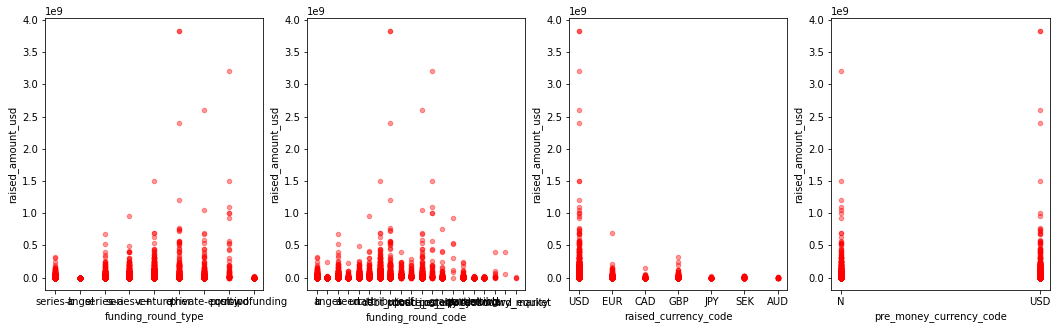

In [62]:

# To help identify categorical variables, we create subplots of the features against price:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(18,5))

for xcol, ax in zip(funding_rounds[['funding_round_type','funding_round_code',
                                    'raised_currency_code','pre_money_currency_code']], axes):
    funding_rounds.plot(kind='scatter', x=xcol, y='raised_amount_usd', ax=ax, alpha=0.4, color='r')

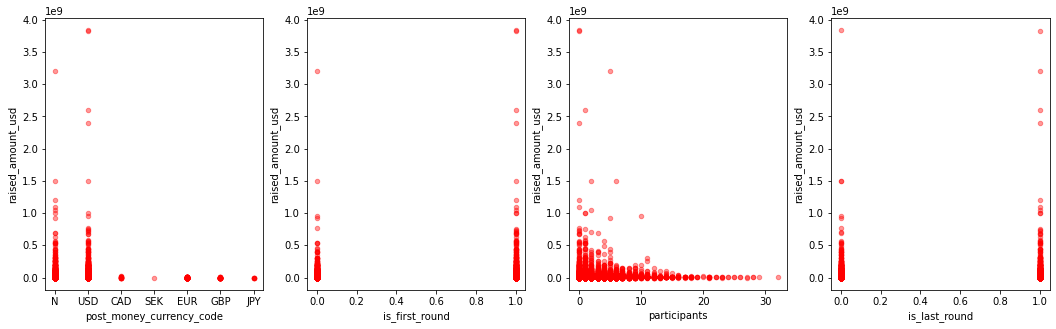

In [63]:
# To help identify categorical variables, we create subplots of the features against price:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(18,5))

for xcol, ax in zip(funding_rounds[['post_money_currency_code','is_first_round',
                                    'participants', 'is_last_round']], axes):
    funding_rounds.plot(kind='scatter', x=xcol, y='raised_amount_usd', ax=ax, alpha=0.4, color='r')

In [64]:
# To help identify categorical variables, we create subplots of the features against price:
#fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18,5))

#for xcol, ax in zip(funding_rounds[['created_by','created_at',
                             #       'updated_at ']], axes):
 #   funding_rounds.plot(kind='scatter', x=xcol, y='raised_amount_usd', ax=ax, alpha=0.4, color='r')

In [65]:
# Identifying the categorical features in our dataset and their unique values which we can then encode
print(np.sort(funding_rounds['funding_round_type'].unique()))
print(np.sort(funding_rounds['funding_round_code'].unique()))
print(np.sort(funding_rounds['raised_currency_code'].unique()))
print(np.sort(funding_rounds['pre_money_currency_code'].unique()))
print(np.sort(funding_rounds['post_money_currency_code'].unique()))
print(np.sort(funding_rounds['is_first_round'].unique()))
print(np.sort(funding_rounds['is_last_round'].unique()))
print(np.sort(funding_rounds['created_by'].unique()))
print(np.sort(funding_rounds['created_at'].unique()))
print(np.sort(funding_rounds['updated_at '].unique()))

['angel' 'crowdfunding' 'other' 'post-ipo' 'private-equity' 'series-a'
 'series-b' 'series-c+' 'venture']
['a' 'angel' 'b' 'c' 'convertible' 'crowd' 'crowd_equity' 'd' 'debt_round'
 'e' 'f' 'g' 'grant' 'partial' 'post_ipo_debt' 'post_ipo_equity'
 'private_equity' 'secondary_market' 'seed' 'unattributed']
['AUD' 'CAD' 'EUR' 'GBP' 'JPY' 'SEK' 'USD']
['N' 'USD']
['CAD' 'EUR' 'GBP' 'JPY' 'N' 'SEK' 'USD']
[0 1]
[0 1]
['0c30a52b801ef670cb1a727a9af12c65a22722e1' '1122media' '1rickcooper' ...
 'zvaigzdinas' 'zwoor' 'zykina']
['2007-05-27 06:08:18' '2007-05-27 06:09:10' '2007-05-27 06:09:36' ...
 '2013-12-12 14:19:35' '2013-12-12 14:23:49' '2013-12-12 14:27:53']
['2008-02-05 22:44:46' '2008-02-11 04:54:00' '2008-02-24 21:10:28' ...
 '2013-12-12 14:19:35' '2013-12-12 14:23:49' '2013-12-12 14:27:53']


In [66]:
# Assigning dummy variables to categorical features
funding_round_type_dummies = pd.get_dummies(funding_rounds['funding_round_type'], prefix='fund', drop_first=True, dtype=float)
funding_round_code_dummies = pd.get_dummies(funding_rounds['funding_round_code'], prefix='fund', drop_first=True, dtype=float)
raised_currency_code_dummies = pd.get_dummies(funding_rounds['raised_currency_code'], prefix='currency_code', drop_first=True, dtype=float)
pre_money_currency_code_dummies = pd.get_dummies(funding_rounds['pre_money_currency_code'], prefix='pre_cur_code', drop_first=True, dtype=float)
post_money_currency_code_dummies = pd.get_dummies(funding_rounds['post_money_currency_code'], prefix='post_cur_code', drop_first=True, dtype=float)
is_first_round_dummies = pd.get_dummies(funding_rounds['is_first_round'], prefix='is_first', drop_first=True, dtype=float)
is_last_round_dummies = pd.get_dummies(funding_rounds['is_last_round'], prefix='is_last', drop_first=True, dtype=float)





In [67]:
# Creating a new dataframe to be used for the linear regression with dummy variables
fundround_dummy = funding_rounds.drop(['funding_round_type', 
                                       'funding_round_code',
                                       'raised_currency_code', 
                                       'pre_money_currency_code',
                                       'post_money_currency_code',
                                      'is_first_round',
                                      'is_last_round'], axis=1)

In [68]:
df_dummy = pd.concat([fundround_dummy, 
                      funding_round_type_dummies, 
                      funding_round_code_dummies, 
                      raised_currency_code_dummies, 
                      pre_money_currency_code_dummies, 
                      post_money_currency_code_dummies,
                      is_first_round_dummies,
                      is_last_round_dummies
                      ], axis=1)


In [69]:
df_dummy.head()

,id,funding_round_id,object_id,funded_at,raised_amount_usd,raised_amount,pre_money_valuation_usd,pre_money_valuation,post_money_valuation_usd,post_money_valuation,...,currency_code_USD,pre_cur_code_USD,post_cur_code_EUR,post_cur_code_GBP,post_cur_code_JPY,post_cur_code_N,post_cur_code_SEK,post_cur_code_USD,is_first_1,is_last_1
0,1,1,NaN,NaN,8500000,8500000,NaN,NaN,N,N,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2,2,NaN,NaN,500000,500000,NaN,NaN,N,N,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,3,3,NaN,NaN,12700000,12700000,115000000.0,115000000.0,N,N,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4,4,NaN,NaN,27500000,27500000,525000000.0,525000000.0,N,N,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5,5,NaN,NaN,10500000,10500000,NaN,NaN,N,N,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## Now that we have transformed our data, how is it distributed?

In [70]:
print("Median Raised Amount: $", funding_rounds['raised_amount'].median())


Median Raised Amount: $ 2200000.0


In [71]:
print("Mean Raised Amount: $",round(funding_rounds['raised_amount'].mean(),2))


Mean Raised Amount: $ 9041157.8


In [72]:
print("Most Common Amount Raised: $", funding_rounds['raised_amount'].mode())


Most Common Amount Raised: $ 0    1000000
dtype: int64


In [73]:
funding_rounds['raised_amount'].describe()

count    4.692700e+04
mean     9.041158e+06
std      4.723233e+07
min      1.000000e+03
25%      5.000000e+05
50%      2.200000e+06
75%      8.000000e+06
max      3.835050e+09
Name: raised_amount, dtype: float64

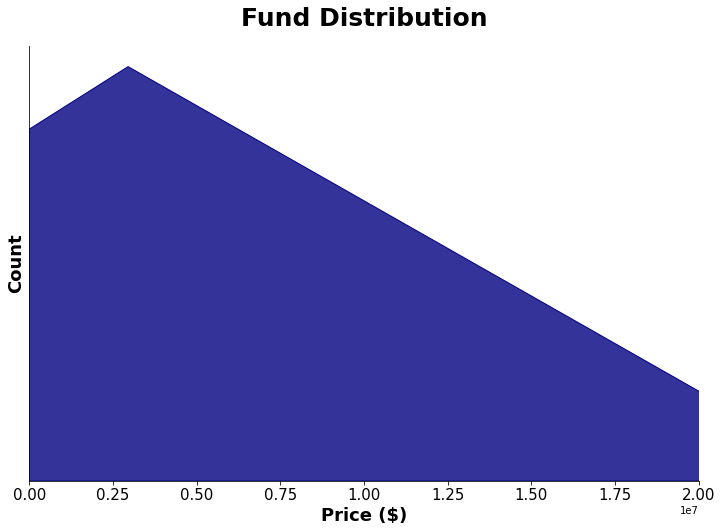

In [74]:

# A histogram showing distribution of price (capped at $2 mil for a more accurate visualisation)
fig, ax = plt.subplots(figsize=(12,8))

sns.kdeplot(funding_rounds['raised_amount'], shade=True, color='navy',alpha=0.8)
sns.despine()

plt.yticks([])
ax.tick_params(axis='both', which='major', labelsize=15)

ax.set_title('Fund Distribution', fontsize=25, loc='center', weight='bold', pad=20)
ax.set_xlabel('Price ($)', fontsize=18, weight='bold')
ax.set_ylabel('Count', fontsize=18, weight='bold')

plt.xlim(0,20000000)
plt.show()

In [75]:
# Preparing the data for a heatmap visualisation of raising funds 
# This will give us an overview of the distribution of 

raised_funds = funding_rounds['raised_amount'].tolist()


funds_multiple = []
for x in raised_funds:
    funds_multiple.append(x/100000)

In [76]:
funds_multiple

[85.0,
 5.0,
 127.0,
 275.0,
 105.0,
 15.0,
 100.0,
 15.0,
 63.0,
 0.12,
 0.4,
 400.0,
 135.0,
 37.1,
 57.0,
 132.0,
 15.0,
 450.0,
 38.0,
 85.0,
 125.0,
 105.2,
 65.0,
 25.0,
 55.0,
 70.0,
 90.0,
 50.0,
 22.5,
 125.0,
 250.0,
 10.0,
 300.0,
 50.0,
 260.0,
 68.5,
 60.0,
 60.0,
 250.0,
 7.0,
 40.0,
 200.0,
 75.0,
 125.0,
 70.0,
 30.0,
 15.0,
 40.0,
 9.0,
 33.0,
 150.0,
 195.0,
 180.0,
 80.0,
 10.0,
 80.0,
 50.0,
 200.0,
 130.0,
 1.0,
 70.0,
 40.0,
 42.5,
 31.0,
 50.0,
 100.0,
 35.0,
 80.0,
 30.0,
 200.0,
 188.0,
 60.0,
 70.0,
 62.0,
 90.0,
 35.0,
 28.0,
 60.0,
 30.0,
 5.0,
 65.0,
 80.0,
 53.5,
 12.0,
 40.0,
 100.0,
 50.0,
 440.0,
 10.0,
 2.25,
 32.0,
 80.0,
 150.0,
 0.5,
 80.0,
 4.5,
 15.0,
 70.0,
 121.0,
 23.0,
 7.0,
 50.0,
 15.0,
 150.0,
 13.0,
 5.0,
 10.0,
 150.0,
 150.0,
 200.0,
 80.0,
 10.0,
 10.0,
 120.0,
 80.0,
 110.0,
 10.0,
 70.0,
 70.0,
 40.0,
 150.0,
 100.0,
 48.0,
 11.0,
 100.0,
 185.0,
 50.0,
 78.0,
 120.0,
 3.5,
 21.0,
 41.0,
 40.0,
 80.0,
 35.0,
 90.0,
 30.0,
 47.0,
 100.

## A closer look into feature variables 

In [77]:
print(funding_rounds.keys())

Index(['id', 'funding_round_id', 'object_id', 'funded_at',
       'funding_round_type', 'funding_round_code', 'raised_amount_usd',
       'raised_amount', 'raised_currency_code', 'pre_money_valuation_usd',
       'pre_money_valuation', 'pre_money_currency_code',
       'post_money_valuation_usd', 'post_money_valuation',
       'post_money_currency_code', 'participants', 'is_first_round',
       'is_last_round', 'source_url', 'source_description', 'created_by',
       'created_at', 'updated_at ', 'raised_2mil'],
      dtype='object')


In [78]:
# Create a dataframe dropping certain features to then plot histograms showing distribution of features
funding_round_feature_dist = funding_rounds.drop(['id','funding_round_id', 'object_id', 
                                                  'participants', 'source_url',
                                                  'source_description', 'created_by'], axis=1)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


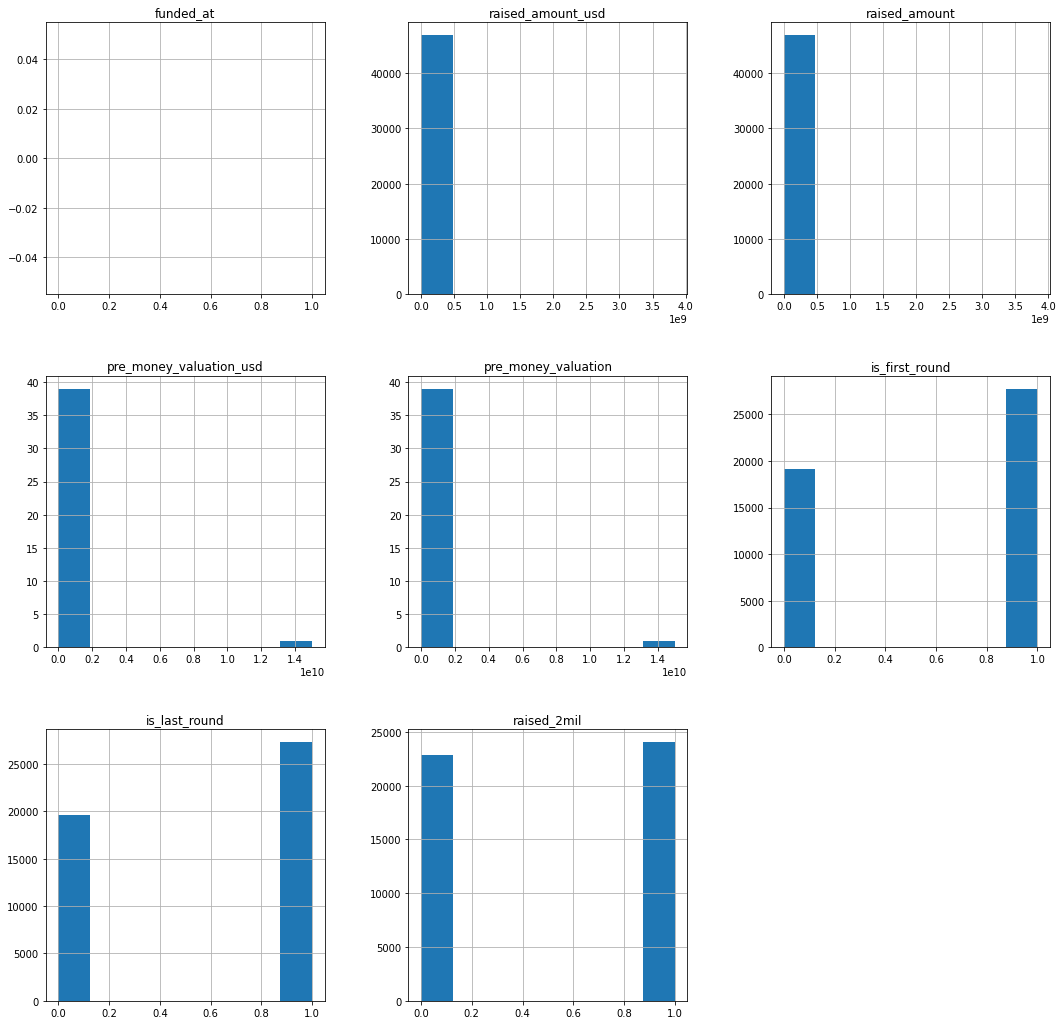

In [79]:
# Distribution of features
fig = plt.figure(figsize = (18,18))
ax = fig.gca()
funding_round_feature_dist.hist(ax = ax, bins=8)
plt.show()

In [80]:
funding_rounds.corr()

,id,funding_round_id,object_id,funded_at,raised_amount_usd,raised_amount,pre_money_valuation_usd,pre_money_valuation,participants,is_first_round,is_last_round,raised_2mil
id,1.000000,1.000000,NaN,NaN,-0.032708,-0.029902,-0.034270,-0.034270,-0.238439,0.196602,-0.048527,-0.220195
funding_round_id,1.000000,1.000000,NaN,NaN,-0.032708,-0.029902,-0.034270,-0.034270,-0.238439,0.196602,-0.048527,-0.220195
object_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
funded_at,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
raised_amount_usd,-0.032708,-0.032708,NaN,NaN,1.000000,0.942949,0.959721,0.959721,0.063463,-0.000637,-0.040363,0.180471
raised_amount,-0.029902,-0.029902,NaN,NaN,0.942949,1.000000,0.959714,0.959714,0.062889,-0.000703,-0.037512,0.171249
pre_money_valuation_usd,-0.034270,-0.034270,NaN,NaN,0.959721,0.959714,1.000000,1.000000,-0.069302,-0.187040,-0.194108,0.151556
pre_money_valuation,-0.034270,-0.034270,NaN,NaN,0.959721,0.959714,1.000000,1.000000,-0.069302,-0.187040,-0.194108,0.151556
participants,-0.238439,-0.238439,NaN,NaN,0.063463,0.062889,-0.069302,-0.069302,1.000000,-0.081636,-0.108896,0.250084
is_first_round,0.196602,0.196602,NaN,NaN,-0.000637,-0.000703,-0.187040,-0.187040,-0.081636,1.000000,0.103142,-0.102651


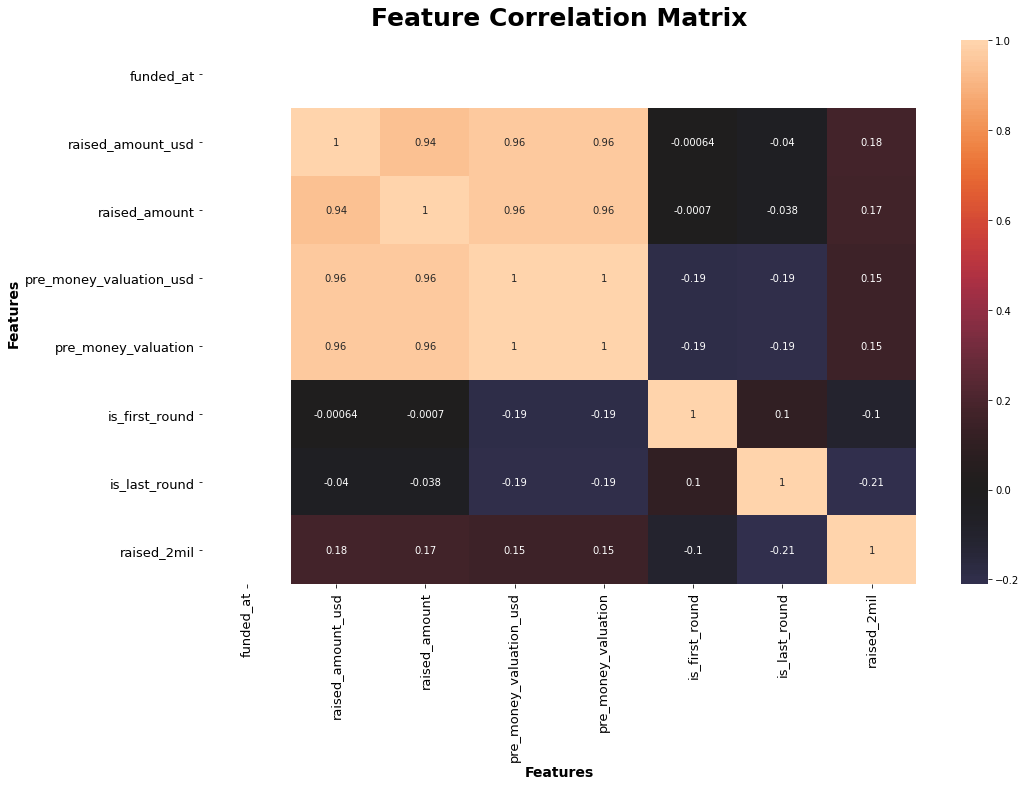

In [81]:
# Choosing features to check for multicollinearity 
fund_round_multicoll = funding_rounds.drop(['id','funding_round_id', 'object_id', 
                                                  'participants', 'source_url',
                                                  'source_description', 'created_by'], axis=1)

fig, ax = plt.subplots(figsize=(16,10))
sns.heatmap(fund_round_multicoll.corr(), center=0, annot=True)

ax.set_title('Feature Correlation Matrix', fontsize=25, loc='center', weight='bold', pad=15)
ax.set_xlabel('Features', fontsize=14, weight='bold')
ax.set_ylabel('Features', fontsize=14, weight='bold')
ax.tick_params(axis='both', which='major', labelsize=13)

plt.autoscale()
plt.show()

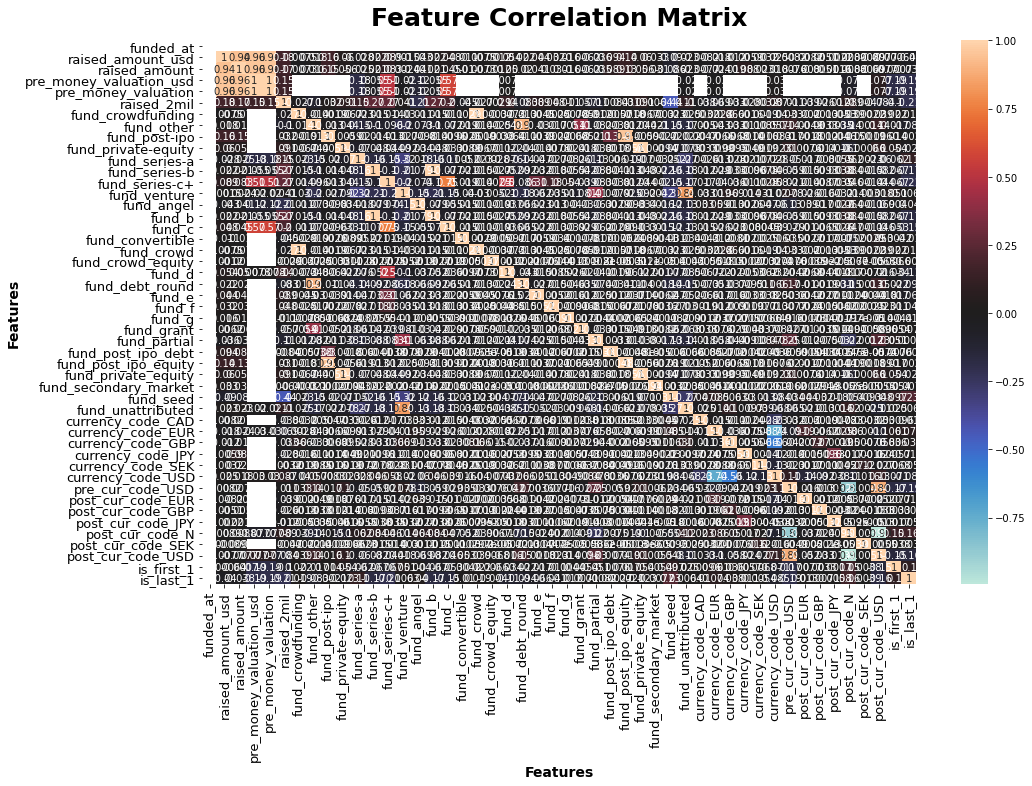

In [82]:
# Choosing features to check for multicollinearity 
df_multicoll_dummies = df_dummy.drop(['id','funding_round_id', 'object_id', 
                                                  'participants', 'source_url',
                                                  'source_description', 'created_by'], axis=1)

fig, ax = plt.subplots(figsize=(16,10))
sns.heatmap(df_multicoll_dummies.corr(), center=0, annot=True)

ax.set_title('Feature Correlation Matrix', fontsize=25, loc='center', weight='bold', pad=15)
ax.set_xlabel('Features', fontsize=14, weight='bold')
ax.set_ylabel('Features', fontsize=14, weight='bold')
ax.tick_params(axis='both', which='major', labelsize=13)

plt.autoscale()
plt.show()

# Modelling the Data

In [83]:
df_dummy.head()

,id,funding_round_id,object_id,funded_at,raised_amount_usd,raised_amount,pre_money_valuation_usd,pre_money_valuation,post_money_valuation_usd,post_money_valuation,...,currency_code_USD,pre_cur_code_USD,post_cur_code_EUR,post_cur_code_GBP,post_cur_code_JPY,post_cur_code_N,post_cur_code_SEK,post_cur_code_USD,is_first_1,is_last_1
0,1,1,NaN,NaN,8500000,8500000,NaN,NaN,N,N,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2,2,NaN,NaN,500000,500000,NaN,NaN,N,N,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,3,3,NaN,NaN,12700000,12700000,115000000.0,115000000.0,N,N,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4,4,NaN,NaN,27500000,27500000,525000000.0,525000000.0,N,N,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5,5,NaN,NaN,10500000,10500000,NaN,NaN,N,N,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [84]:
#let's drop some columns that won't be necessary, as done above
df_dummy_new = df_dummy.drop(['id','funding_round_id', 'object_id', 
                                                  'participants', 'source_url',
                                                  'source_description', 'created_by'], axis=1)


In [85]:
# X variables will contain our continuous and discrete features - we drop the dependent as well as non-predictors

X_base = df_dummy_new.drop(['raised_amount_usd'], axis=1)

# Y variable is the dependent variable - what we want to predict
Y_base = df_dummy[['raised_amount_usd']]

In [86]:
# Creating train test split (80/20 split)
X_train, X_test, Y_train, Y_test = train_test_split(X_base,Y_base,test_size=.2, random_state=40)
X_train = X_train.copy()
X_test = X_test.copy()
Y_train = Y_train.copy()
Y_test = Y_test.copy()

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


(37541, 51)
(9386, 51)
(37541, 1)
(9386, 1)


In [87]:
# Statsmodels OLS for training set
# Adding of constant to fit both the slope and intercept 
X_train_const = sm.add_constant(X_train)
#base_training_model = sm.OLS(Y_train.astype(float), X_train_const.astype(float));

In [88]:
base_training_model = sm.OLS(Y_train, X_train_const.astype(float)).fit()

ValueError: could not convert string to float: 'N'

In [89]:
X_train_const

,const,funded_at,raised_amount,pre_money_valuation_usd,pre_money_valuation,post_money_valuation_usd,post_money_valuation,created_at,updated_at,raised_2mil,...,currency_code_USD,pre_cur_code_USD,post_cur_code_EUR,post_cur_code_GBP,post_cur_code_JPY,post_cur_code_N,post_cur_code_SEK,post_cur_code_USD,is_first_1,is_last_1
12625,1.0,NaN,1202627,NaN,NaN,N,N,2010-04-02 05:11:46,2010-04-02 05:11:46,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
28982,1.0,NaN,1016000,NaN,NaN,N,N,2012-07-31 22:09:41,2013-07-30 09:39:17,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
8396,1.0,NaN,14000000,NaN,NaN,N,N,2009-10-16 20:56:40,2009-10-16 20:56:40,1,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
36952,1.0,NaN,7000000,NaN,NaN,N,N,2013-06-21 10:16:28,2013-06-21 10:16:28,1,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
11476,1.0,NaN,10000000,NaN,NaN,N,N,2010-03-01 09:45:24,2010-03-01 09:45:25,1,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12956,1.0,NaN,1320000,NaN,NaN,N,N,2010-04-12 13:35:48,2010-04-12 13:35:48,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
31097,1.0,NaN,50000,NaN,NaN,1000000,1000000,2012-11-28 01:07:24,2012-12-03 06:51:15,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
16063,1.0,NaN,1400000,NaN,NaN,N,N,2010-08-02 20:58:04,2010-08-02 20:58:04,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
34788,1.0,NaN,700000,NaN,NaN,N,N,2013-05-21 03:51:57,2013-05-21 03:51:57,0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0


In [68]:
post_money_valuation_usd

NameError: name 'post_money_valuation_usd' is not defined